<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [45]:
### TASK 1: FAMILIARIZE YOURSELF WITH THE DATA
print(boston_df)
boston_df.describe()
# The following describes the dataset variables:
    # CRIM - per capita crime rate by town
    # ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    # INDUS - proportion of non-retail business acres per town.
    # CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    # NOX - nitric oxides concentration (parts per 10 million)
    # RM - average number of rooms per dwelling
    # AGE - proportion of owner-occupied units built prior to 1940
    # DIS - weighted distances to five Boston employment centres
    # RAD - index of accessibility to radial highways
    # TAX - full-value property-tax rate per $10,000
    # PTRATIO - pupil-teacher ratio by town
    # LSTAT - % lower status of the population
    # MEDV - Median value of owner-occupied homes in $1000's

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0, 0.5, 'Median Value')

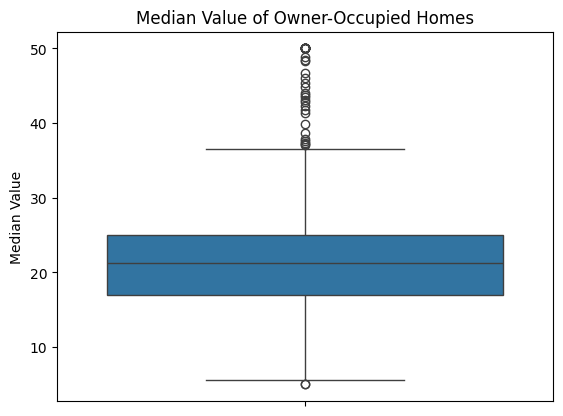

In [47]:
### TASK 2: Generate basic statistics and visualizations

# 2.1: Boxplot of Median value of owner-occupied homes
sns.boxplot(y=boston_df['MEDV'])

# Add a title and labels
pyplot.title('Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value')


Text(0, 0.5, 'Count')

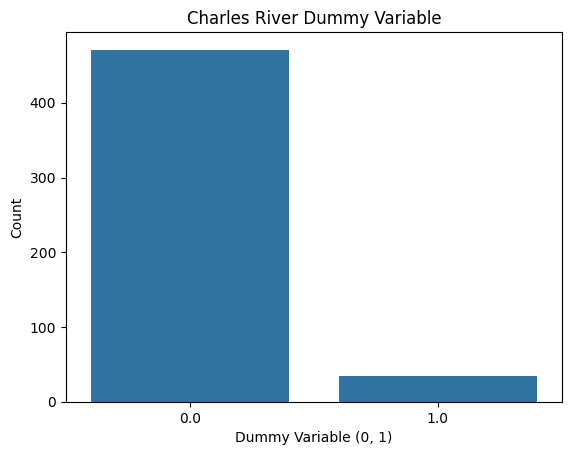

In [48]:
# 2.2 Provide a bar plot for the Charles river variable
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Charles River Dummy Variable')
pyplot.xlabel('Dummy Variable (0, 1)')
pyplot.ylabel('Count')

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'AGE_GROUP'],
      dtype='object')


Text(0, 0.5, 'Median Value')

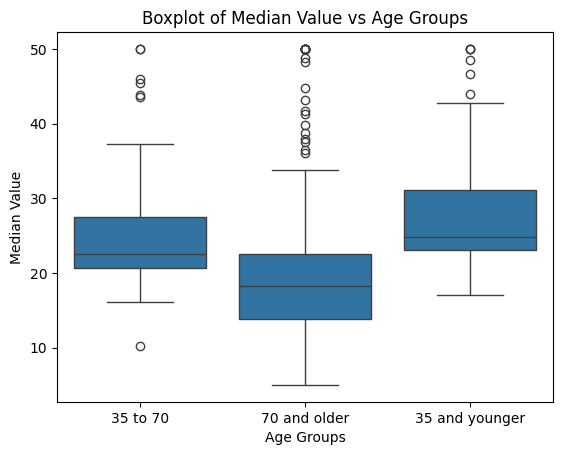

In [17]:
# 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
print(boston_df.columns)
boston_df['AGE_GROUP'] = [
    '35 and younger' if age < 35 else 
    '35 to 70' if age < 70 else 
    '70 and older' 
    for age in boston_df['AGE']
]

# Create a boxplot for 'MEDV' against the discretized 'AGE' variable
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)

# Add a title and labels
pyplot.title('Boxplot of Median Value vs Age Groups')
pyplot.xlabel('Age Groups')
pyplot.ylabel('Median Value')



Text(0, 0.5, 'Proportion of Non-retail Business Acres per Town')

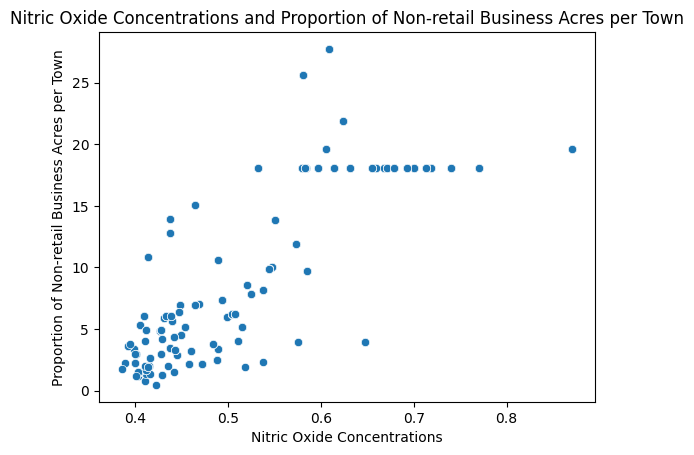

In [54]:
# 2.5 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])

# labels
pyplot.title('Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town')
pyplot.xlabel('Nitric Oxide Concentrations')
pyplot.ylabel('Proportion of Non-retail Business Acres per Town')
# there seems to be a positive correlation between the two variables

Text(0, 0.5, 'Count')

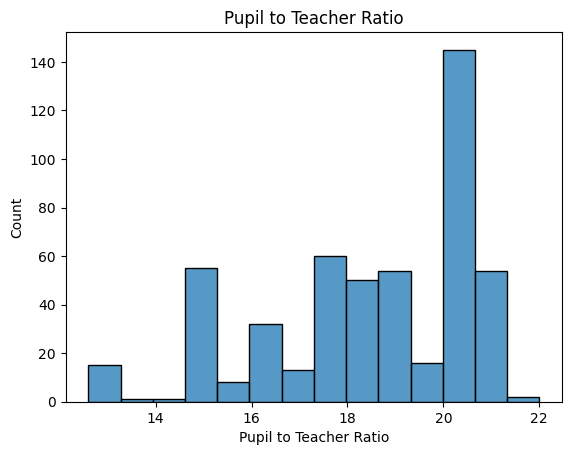

In [62]:
# 2.6 Create a histogram for the pupil to teacher ratio variable
sns.histplot(x=boston_df['PTRATIO'])

# Add a title and labels
pyplot.title('Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Count')


In [13]:
### TASK THREE: Use the appropriate tests to answer the questions provided

## 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# NULL HYPOTHESIS: There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the Charles River.

t_stat, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                                        boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                                        equal_var=False)

alpha = 0.05
print(f'T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}')
print("Conclusion:", "Reject the null hypothesis (significant difference)" if p_value <= alpha else "Fail to reject the null hypothesis (no significant difference)")

T-statistic: 3.1133, P-value: 0.0036
Conclusion: Reject the null hypothesis (significant difference)


In [19]:
## 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# NULL HYPOTHESIS: there is no significant difference in the median value of houses across different proportions of owner-occupied units built prior to 1940.

# Step 1: Define the model for ANOVA
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()  # 'AGE_GROUP' is treated as a categorical variable

# Step 2: Perform ANOVA test
anova_table = sm.stats.anova_lm(model)  # This function calculates the ANOVA table

# Step 3: Print the entire ANOVA table to understand the results
print("ANOVA Table:")
print(anova_table)

# Step 4: Extract the p-value from the table (it's in the 'PR(>F)' column)
p_value = anova_table['PR(>F)'].iloc[0]  # Access the first p-value (for AGE_GROUP)

# Step 5: Set the significance level (alpha)
alpha = 0.05

# Step 6: Compare the p-value to the significance level
if p_value <= alpha:
    print("There is a significant difference in the median values between the age groups.")
else:
    print("There is no significant difference in the median values between the age groups.")

ANOVA Table:
                 df        sum_sq      mean_sq         F        PR(>F)
C(AGE_GROUP)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN
There is a significant difference in the median values between the age groups.


In [20]:
## 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# NULL HYPOTHESIS: There is no significant relationship between NOX concentrations and INDUS

# Step 1: Extract the two variables of interest from the dataframe
nox = boston_df['NOX']  # Nitric oxide concentrations
indus = boston_df['INDUS']  # Proportion of non-retail business acres per town

# Step 2: Calculate Pearson Correlation and p-value
correlation, p_value = scipy.stats.pearsonr(nox, indus)

# Step 3: Print the correlation coefficient and the p-value
print("\nPearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Step 4: Set the significance level (alpha)
alpha = 0.05

# Step 5: Compare the p-value to the significance level to draw a conclusion
if p_value <= alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant relationship between NOX concentrations and non-retail business acres.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant relationship between NOX concentrations and non-retail business acres.")



Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98

Conclusion: Reject the null hypothesis. There is a significant relationship between NOX concentrations and non-retail business acres.


In [ ]:
## 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# NULL HYPOTHESIS: An additional weighted distance to the five Boston employment centers does not have a significant impact on the median value of owner-occupied homes.